### Contents
Introduction<br>
Visualizing Loss Functions<br>
The Guessing Game<br>

In [8]:
import torch
from torch import Tensor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Introduction

In [9]:
def plot_data(x: np.ndarray, y1: np.ndarray, y2: np.ndarray=None) -> None:
    ax = plt.subplots()[1]
    ax.set_xlim(x.min()-5, x.max()+5)
    ax.set_ylim(y1.min()-5, y1.max()+5)
    plt.scatter(x, y1, color='blue')
    if not y2 is None:
        ax.scatter(x, y2, color='red')
    plt.grid(True)
    plt.axhline(color='black')
    plt.axvline(color='black')

In [16]:
def mse(guess: Tensor, answer: Tensor) -> Tensor:
    return ((guess-answer)**2).mean().sqrt()

guess = torch.tensor([50, 50, 50], dtype=torch.float64)
guess.requires_grad_()
answer = torch.tensor([2, 77, 91], dtype=torch.float64)
loss = mse(guess, answer)

loss.backward()
lr = 1e-1   # This is 0.1
step = lr * guess.grad.data

print('loss Dimensions:', loss.ndim)
print('loss Shape:', loss.shape)
print(loss)

print('\nGradient Dimenstions:', guess.grad.ndim)
print('Gradient Shape:', guess.grad.shape)
print(guess.grad)

print('\nStep Dimenstions:', step.ndim)
print('Step Shape:', step.shape)
print(step)


loss Dimensions: 0
loss Shape: torch.Size([])
tensor(39.6400, dtype=torch.float64, grad_fn=<SqrtBackward0>)

Gradient Dimenstions: 1
Gradient Shape: torch.Size([3])
tensor([ 0.4036, -0.2270, -0.3448], dtype=torch.float64)

Step Dimenstions: 1
Step Shape: torch.Size([3])
tensor([ 0.0404, -0.0227, -0.0345], dtype=torch.float64)


In [25]:
attempts = 20
answer = torch.tensor([2, 77, 91], dtype=torch.float64)
guess = torch.tensor([50, 50, 50], dtype=torch.float64)
guess.requires_grad_()

for attempt in range(attempts):
    loss = mse(guess, answer)

    loss.backward()
    lr = 2
    step = lr * guess.grad.data
    guess.data -= step
    guess.grad = None

    print(attempt+1, guess.data, loss.data, step.data)

1 tensor([49.1927, 50.4541, 50.6895], dtype=torch.float64) tensor(39.6400, dtype=torch.float64) tensor([ 0.8073, -0.4541, -0.6895], dtype=torch.float64)
2 tensor([48.3855, 50.9082, 51.3791], dtype=torch.float64) tensor(38.9734, dtype=torch.float64) tensor([ 0.8073, -0.4541, -0.6895], dtype=torch.float64)
3 tensor([47.5782, 51.3623, 52.0686], dtype=torch.float64) tensor(38.3067, dtype=torch.float64) tensor([ 0.8073, -0.4541, -0.6895], dtype=torch.float64)
4 tensor([46.7709, 51.8163, 52.7582], dtype=torch.float64) tensor(37.6400, dtype=torch.float64) tensor([ 0.8073, -0.4541, -0.6895], dtype=torch.float64)
5 tensor([45.9637, 52.2704, 53.4477], dtype=torch.float64) tensor(36.9734, dtype=torch.float64) tensor([ 0.8073, -0.4541, -0.6895], dtype=torch.float64)
6 tensor([45.1564, 52.7245, 54.1372], dtype=torch.float64) tensor(36.3067, dtype=torch.float64) tensor([ 0.8073, -0.4541, -0.6895], dtype=torch.float64)
7 tensor([44.3491, 53.1786, 54.8268], dtype=torch.float64) tensor(35.6400, dtype=t

### Visualizing Loss Functions

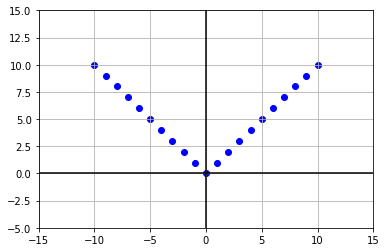

In [11]:
x = np.array([x for x in range(-10, 11)])
losses = [mse(torch.tensor(x, dtype=torch.float64), torch.tensor(0, dtype=torch.float64)) for x in range(-10, 11)]

# This will not work because at least one of the values needs to be a tensor so that the mean method of 
# the tensor object can be found within the mse function.
#losses = [mse(x, 0) for x in range(-10, 11)]

# We cannot do this because we want a loss for every value in x. 
# We do not want a single scalar value.
#losses = mse(torch.from_numpy(x), torch.zeros(21))

plot_data(np.array(x), np.array(losses))

#### The Guessing Game